**CSE 5522 Lab #1: Regression**

**Author: Stephen Zheng zheng.1393**

The goals of this lab are to familarize you with:

*   Gradient descent
*   Multivariate regression
*   Logistic regression
*   Data exploration

**Initial notes**

* (If you are using Google Colab) Make a copy of this page in your google drive so that you can edit it.

* While not completely necessary for this assignment, you may want to familiarize yourself with the following packages: [numpy](https://numpy.org), [scikit-learn](https://scikit-learn.org), [pandas](https://pandas.pydata.org), [matplotlib](https://matplotlib.org).
 * Especially numpy, many of the calculations in this lab (and later) can be done in one line using numpy. Whereas raw python may require 5-10x that.

* Feel free to (please do!) change the structure of the document below. Especially, add code sections to break your code into logical pieces and add text sections to explain your code or results

---
---



**Part 1: Multivariate regression (20 pts)**

In this part of the lab, you'll explore multivariate regression.  We'll use the *scikit-learn* linear regression tool (although you're welcome to extend your code from the hands-on).  The primary reason for this is that the sklearn routines will handle some of the normalization issues for you.

Note: Some parts of this tutorial were based on [Argawal, Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155).

**1.0:** We'll be looking at the Boston Housing dataset which is built in to sklearn, but has more variables. Load the dataset in:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston_dataset=load_boston()

**1.1** You can see a description of the dataset by printing the dataset's DESCR attribute (set by the sklearn.dataset package).

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**1.2:** We can convert this data into a pandas dataframe and then look at the first few rows in tabular form.

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV']=boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**1.3:** At this point, we want to figure out what variables are good predictors of the median value of a house in Boston.  We can find the relationship between single variables by looking at the correlation between variables.  

---

*Side note: the correlation between two vectors of variables x and y is*
```
1/(n-1) sum x*y
```
*assuming that x and y have zero mean and a standard gaussian distribution (which you can achieve by subtracting the mean and dividing by the standard deviation).  If x and y always share the same sign, then this value will be positive; if x and y are always opposite sign then the correlation is negative.*

---

The sklearn.datasets class has a built in correlation function, which we can use to compute the correlation between each pair of variables.  We can also use the seaborn package to plot a nice heatmap of these variables.

**What's the most correlated variable with MEDV?**


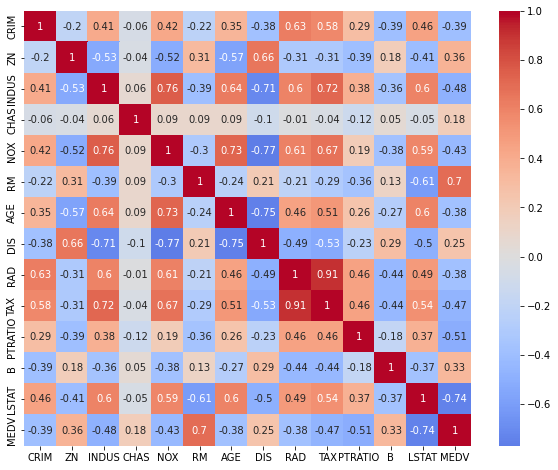

In [ ]:
import seaborn as sb

correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(10,8))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

Note that the most correlated variable is LSTAT (at -0.74) and not RM (0.70) - while the correlation is negative, it just means that there is an inverse relationship between LSTAT and MEDV (when LSTAT goes up, MEDV goes down), but LSTAT should be the single best predictor.

**1.4:** Now, we kind of cheated there, since we figured out the correlation on the entire dataset.  A better practice is to randomly select training and test sets, fit the data on the training set, and then evaluate on the test set.  Let's see if LSTAT really is a better predictor than RM of MEDV.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# first, set up dataframe for all variables
boston_totaldata = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_totaltarget = boston_dataset.target
boston_traindata, boston_testdata, boston_traintarget, boston_testtarget = train_test_split(boston_totaldata,
                                                                                           boston_totaltarget,
                                                                                           test_size=0.2,
                                                                                           random_state=5)
#"random_state" sets the random seed used when dividing the datasets. Setting it to a fixed number like this means
#we will get the same "random" split every time. If you truly want random, remove this argument

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97


In [ ]:
boston_testdata.shape

(102, 13)

In [ ]:
# subselect LSTAT data, train model
#   note the double square brackets - need 2-dimensional array to come out of selection
lstat_traindata=boston_traindata[['LSTAT']]
lstat_testdata=boston_testdata[['LSTAT']]
lin_model = LinearRegression()
lin_model.fit(lstat_traindata,boston_traintarget)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lstat_testdata

,LSTAT
226,3.13
292,4.70
90,8.81
373,34.77
273,6.58
...,...
349,5.89
212,16.03
156,16.14
480,10.74


In [ ]:
lstat_testpredict=lin_model.predict(lstat_testdata)
rmse = (np.sqrt(mean_squared_error(boston_testtarget,lstat_testpredict)))
r2 = r2_score(boston_testtarget,lstat_testpredict)
print('Test RMSE = {}, Test R2 = {}'.format(rmse,r2))

Test RMSE = 6.2307165730986815, Test R2 = 0.5041523728903132


*Note:* We do no normalizing here because sklearn will do it for us, if necessary

R2 is the amount of variation explained by the model, and can range from 0 (no variance explained) to 1 (perfect explanation).

*Something for you to think about:* Notice that R2 is much lower than the correlation coefficient.  Why? (There are 2 reasons.)

**1.4a:** Let's do it again for RM (this time, you calculate it).

In [ ]:
# Copy and modify the example above to predict using RM (instead of LSTAT)
# Of course, also calculate RMSE and R2 for the new prediction
rm_traindata = boston_traindata[['RM']]
rm_testdata = boston_testdata[['RM']]
lin_model = LinearRegression()
lin_model.fit(rm_traindata, boston_traintarget)

rm_testpredict = lin_model.predict(rm_testdata)
rmse = (np.sqrt(mean_squared_error(boston_testtarget, rm_testpredict)))
r2 = r2_score(boston_testtarget, rm_testpredict)
print('Test RMSE = {}, Test R2 = {}'.format(rmse, r2))

Test RMSE = 4.895963186952216, Test R2 = 0.6938399401553497


(Note: answers for why R2 is lower that correlation is that (a) it's roughly the square of correlation, and also (b) we calculated correlation on the entire training set; R2 was calculated on test only.)

**1.5:** At this point, you can start to look at how to predict from multiple variables.  What are the two best variables in predicting as measured by R2? (Try every possible variable pair.)

Answer: According to the result RM and TAX has the highest R2 score with 0.7499.

Are the results better than predicting using all variables?

Answer: The result is better than predicting using all variable, since the r2 score with all variables is 0.7334.

In [ ]:
# Rebuild your previous training method to do two variable/feature prediction.
# Loop over and train models for every possible pair
for i in range(13):
  for j in range (13):
    if i == j:
      continue
    multi_traindata = boston_traindata.iloc[:, [i, j]]
    multi_testdata = boston_testdata.iloc[:, [i, j]]
    lin_model = LinearRegression()
    lin_model.fit(multi_traindata, boston_traintarget)

    multi_testpredict = lin_model.predict(multi_testdata)
    rmse = (np.sqrt(mean_squared_error(boston_testtarget, multi_testpredict)))
    r2 = r2_score(boston_testtarget, multi_testpredict)
    print('Predict from {} and {}'.format(multi_traindata.columns[0], multi_traindata.columns[1]))
    print('Test RMSE = {}, Test R2 = {}'.format(rmse, r2))
    print('---------------------------')

# Test with all vars
lin_model = LinearRegression()
lin_model.fit(boston_traindata, boston_traintarget)
testpredict = lin_model.predict(boston_testdata)
rmse = (np.sqrt(mean_squared_error(boston_testtarget, testpredict)))
r2 = r2_score(boston_testtarget, testpredict)
print('All VARS Test RMSE = {}, Test R2 = {}'.format(rmse, r2))

---
---
**Part 2: Predicting Gene Expression (40 pts)**

There are ~20,000 genes in the human genome. Each one of them is transcribed to mRNA and then translated to proteins which carry on various tasks inside our body. We can measure the amount of 20,000 mRNA expressed in samples collected from different organs. This collection is called _gene expression profile_.

Although our genome is the same across all cell types, the gene expression profile is different because each organ needs different proteins for its survival. One of the regulatory mechanisms which controls the expression level in each cell type is microRNA (miR). MicroRNAs are small molecules which attach to mRNAs and prevent them from translation to proteins and also degrade them.

So if miR A targets mRNA B when A increases B decreases. Our goal is to predict mRNA levels (gene expression profile) using 21 miR features. Note that each of the 20,000 expression levels can be a response of regression with 21 features. To simplify, we have selected a few genes to predict their expression.

Your job will be to investigate how well the miR values predict the mRNA values.  

You are recommended to use the sklearn.linear_model package to conduct linear regression experiments, but you may use other packages if you wish.  

**Instructions:** Load the data from GitHub (example code given).

**Hint:** Part 1 of this lab (Boston Housing) has examples of how to do almost everything you need for this part. Please review it carefully.

In [ ]:
miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL, index_col=0)
# remove row names from the first column, rows=samples, cols=miR features
miR = np.array(miR_df)[:,:]




mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL, index_col = 0)
mRNA_well_df=mRNA_well_df.transpose()
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_well = np.array(mRNA_well_df)[:,:]


mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL, index_col = 0)
mRNA_poor_df=mRNA_poor_df.transpose()
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_poor = np.array(mRNA_poor_df)[:,:]


In [ ]:
#print('miR:\n{}'.format(miR))
#print('mRNA_well:\n{}'.format(mRNA_well))
#print('mRNA_poor:\n{}'.format(mRNA_poor))

In [ ]:
#miR.shape

(8895, 21)

In [ ]:
#mRNA_well.shape

(8895, 35)

In [ ]:
#mRNA_poor.shape

(8895, 20)

In [ ]:
#miR_df.head()

In [ ]:
#mRNA_well_df.head()


In [ ]:
#mRNA_poor_df.head()


You should randomly divide the samples into 80/20 training/test splits, and repeat the experiment 10 times to give mean and standard deviation of the metrics.

**2.1:** Using the *miR* features, predict each of the well-expressed (*mRNA_well*) and poorly-expressed (*mRNA_poor*) genes with a linear model. This means you will be solving 55 separate linear regression problems (one each for 35 well-expressed + 20 poorly expressed).

Perform 10 experiments of the above using a different training/test split each time. Report the the mean and standard deviation (over the 10 experiments) for each of the 55 mRNA targets for both the R2 and RMSE metrics.

*Note:* This means in total you will be building/training 550 different models!

In [ ]:
# Carry on from this point on your own, using the Boston Housing problem as a guide
mRNA_well_error = {}
mRNA_poor_error = {}
for _ in range(10):
  mRNA_well_rmse_list = np.array([])
  mRNA_well_r2_list = np.array([])
  mRNA_poor_rmse_list = np.array([])
  mRNA_poor_r2_list = np.array([])
  miR_traindata, miR_testdata = train_test_split(miR_df, test_size = 0.2)
  mRNA_well_traindata, mRNA_well_testdata = train_test_split(mRNA_well_df, test_size = 0.2)
  mRNA_poor_traindata, mRNA_poor_testdata = train_test_split(mRNA_poor_df, test_size = 0.2)
  for column in mRNA_well_df:
    mRNA_well_traintarget = mRNA_well_traindata[column]
    mRNA_well_testtarget = mRNA_well_testdata[column]
    lin_model = LinearRegression()
    lin_model.fit(miR_traindata, mRNA_well_traintarget)
    miR_testpredict = lin_model.predict(miR_testdata)
    rmse = (np.sqrt(mean_squared_error(mRNA_well_testtarget, miR_testpredict)))
    r2 = r2_score(mRNA_well_testtarget, miR_testpredict)

    mRNA_well_rmse_list = np.append(mRNA_well_rmse_list, rmse)
    mRNA_well_r2_list = np.append(mRNA_well_r2_list, r2)

    tests = {
        'mRNA_well_rmse_avg' : np.average(mRNA_well_rmse_list),
        'mRNA_well_rmse_std' : np.std(mRNA_well_rmse_list),
        'mRNA_well_r2_avg' : np.average(mRNA_well_r2_list),
        'mRNA_well_r2_std' : np.std(mRNA_well_r2_list)
    }
    mRNA_well_error[column] = tests

  for column in mRNA_poor_df:
    mRNA_poor_traintarget = mRNA_poor_traindata[column]
    mRNA_poor_testtarget = mRNA_poor_testdata[column]
    lin_model = LinearRegression()
    lin_model.fit(miR_traindata, mRNA_poor_traintarget)
    miR_testpredict = lin_model.predict(miR_testdata)
    rmse = (np.sqrt(mean_squared_error(mRNA_poor_testtarget, miR_testpredict)))
    r2 = r2_score(mRNA_poor_testtarget, miR_testpredict)

    mRNA_poor_rmse_list = np.append(mRNA_poor_rmse_list, rmse)
    mRNA_poor_r2_list = np.append(mRNA_poor_r2_list, r2)
    tests = {
        'mRNA_poor_rmse_avg' : np.average(mRNA_poor_rmse_list),
        'mRNA_poor_rmse_std' : np.std(mRNA_poor_rmse_list),
        'mRNA_poor_r2_avg' : np.average(mRNA_poor_r2_list),
        'mRNA_poor_r2_std' : np.std(mRNA_poor_r2_list)
    }
    mRNA_poor_error[column] = tests



**2.2:** Visualize and compare the performance of the well expressed gene set to the poorly expressed gene set using R2.  Draw histograms of the R2s for both sets on the same plot; one histogram comparison should be done for train and one for test. (matplotlib has builtin histogram-drawing functions, see the documentation.)

Describe the differences you see across the well and poorly expressed gene sets.

Answer: Using mRNA_well to predict is much better than using mRNA_well.

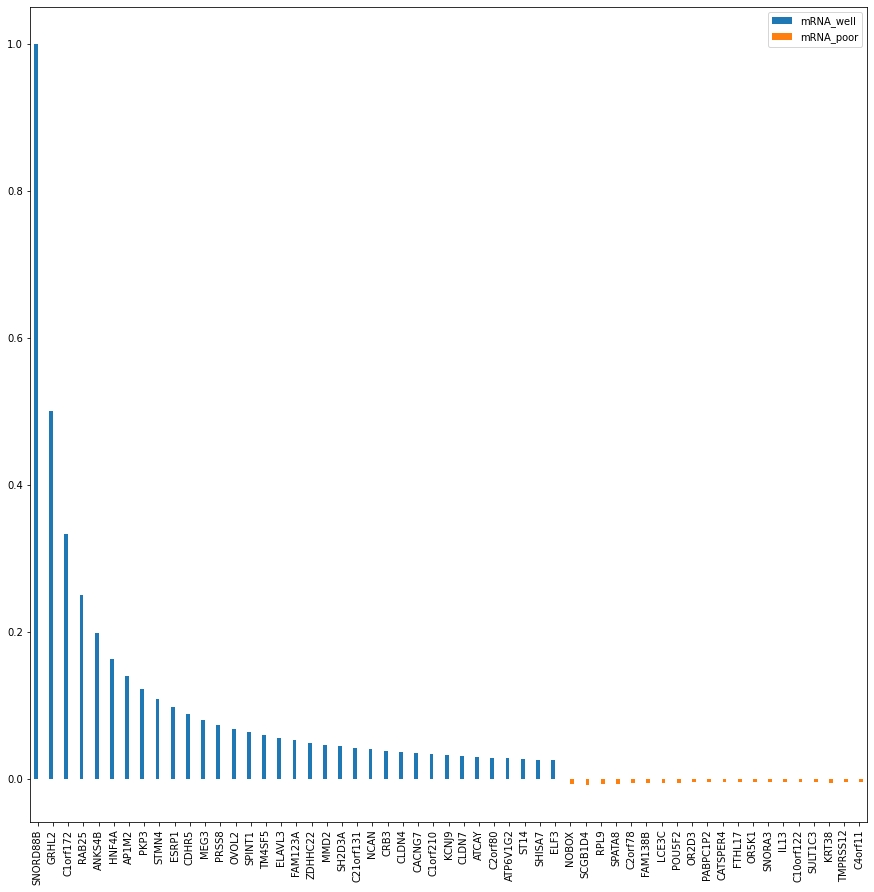

In [ ]:
# Your code here
mRNA_well_r2_df = pd.DataFrame.from_dict(mRNA_well_error).transpose()['mRNA_well_r2_avg']

mRNA_poor_r2_df = pd.DataFrame.from_dict(mRNA_poor_error).transpose()['mRNA_poor_r2_avg']
#print(mRNA_poor_r2_df)

mRNA_r2_df = pd.DataFrame([mRNA_well_r2_df, mRNA_poor_r2_df]).transpose()
#print(mRNA_r2_df)
mRNA_r2_df.columns = ['mRNA_well', 'mRNA_poor']
mRNA_r2_df.plot(kind='bar', figsize=(15, 15))

**2.3:** In this part, we want to add a categorical feature as the 22nd predictor. Tissue type is an important factor in explaining the gene expression profile. Our samples come from 32 tissue types which are provided to you in a separate file. Use dummy variable coding to include the tissue type in your regression.  

Recall that in dummy variable coding of categorical variable X with n levels, we add n - 1 columns to our features. The first level is coded as zero and then for each level, we set one of the columns to 1. For example, if we have a categorical feature for "Direction" with four levels "South, West, North, East" the following codes are required:

|                         | West | North | East |
|-------------------------|:----:|:-----:|:----:|
| Code if Direction=South |   0  |   0   |   0  |
| Code if Direction=West  |   1  |   0   |   0  |
| Code if Direction=North |   0  |   1   |   0  |
| Code if Direction=East  |   0  |   0   |   1  |

So for 32 values for the "Tissue" feature, you need to add 31 columns to your feature (design) matrix. With the newly added feature(s) run the linear regressions again with the 80/20 split and report any change in prediction performance of your model. Also, please *try* to find an explaination for any change in performance you see.

Answer: From the observation of the new plot, almost all of the R2 score increases. I guess is that the tissue as a dummy variable is like a bias or '*w0*' in the linear regression.

In [ ]:
# Load tissue data
tissue_type_URL='https://github.com/efosler/cse5522data/raw/master/cancerType-x-Categorical.csv'
tissue_dataframe=pd.read_csv(tissue_type_URL, index_col = 0)

tissue_dataframe.head()
tissue_dataframe.shape

(8895, 1)

In [ ]:
#Your code here
tissue = pd.get_dummies(tissue_dataframe)
#tissue.head()
#tissue.shape()
miR_df = pd.concat([miR_df, tissue], axis = 1)

In [ ]:
mRNA_well_error = {}
mRNA_poor_error = {}
for _ in range(10):
  mRNA_well_rmse_list = np.array([])
  mRNA_well_r2_list = np.array([])
  mRNA_poor_rmse_list = np.array([])
  mRNA_poor_r2_list = np.array([])
  miR_traindata, miR_testdata = train_test_split(miR_df, test_size = 0.2)
  mRNA_well_traindata, mRNA_well_testdata = train_test_split(mRNA_well_df, test_size = 0.2)
  mRNA_poor_traindata, mRNA_poor_testdata = train_test_split(mRNA_poor_df, test_size = 0.2)
  for column in mRNA_well_df:
    mRNA_well_traintarget = mRNA_well_traindata[column]
    mRNA_well_testtarget = mRNA_well_testdata[column]
    lin_model = LinearRegression()
    lin_model.fit(miR_traindata, mRNA_well_traintarget)
    miR_testpredict = lin_model.predict(miR_testdata)
    rmse = (np.sqrt(mean_squared_error(mRNA_well_testtarget, miR_testpredict)))
    r2 = r2_score(mRNA_well_testtarget, miR_testpredict)

    mRNA_well_rmse_list = np.append(mRNA_well_rmse_list, rmse)
    mRNA_well_r2_list = np.append(mRNA_well_r2_list, r2)

    tests = {
        'mRNA_well_rmse_avg' : np.average(mRNA_well_rmse_list),
        'mRNA_well_rmse_std' : np.std(mRNA_well_rmse_list),
        'mRNA_well_r2_avg' : np.average(mRNA_well_r2_list),
        'mRNA_well_r2_std' : np.std(mRNA_well_r2_list)
    }
    mRNA_well_error[column] = tests

  for column in mRNA_poor_df:
    mRNA_poor_traintarget = mRNA_poor_traindata[column]
    mRNA_poor_testtarget = mRNA_poor_testdata[column]
    lin_model = LinearRegression()
    lin_model.fit(miR_traindata, mRNA_poor_traintarget)
    miR_testpredict = lin_model.predict(miR_testdata)
    rmse = (np.sqrt(mean_squared_error(mRNA_poor_testtarget, miR_testpredict)))
    r2 = r2_score(mRNA_poor_testtarget, miR_testpredict)

    mRNA_poor_rmse_list = np.append(mRNA_poor_rmse_list, rmse)
    mRNA_poor_r2_list = np.append(mRNA_poor_r2_list, r2)
    tests = {
        'mRNA_poor_rmse_avg' : np.average(mRNA_poor_rmse_list),
        'mRNA_poor_rmse_std' : np.std(mRNA_poor_rmse_list),
        'mRNA_poor_r2_avg' : np.average(mRNA_poor_r2_list),
        'mRNA_poor_r2_std' : np.std(mRNA_poor_r2_list)
    }
    mRNA_poor_error[column] = tests

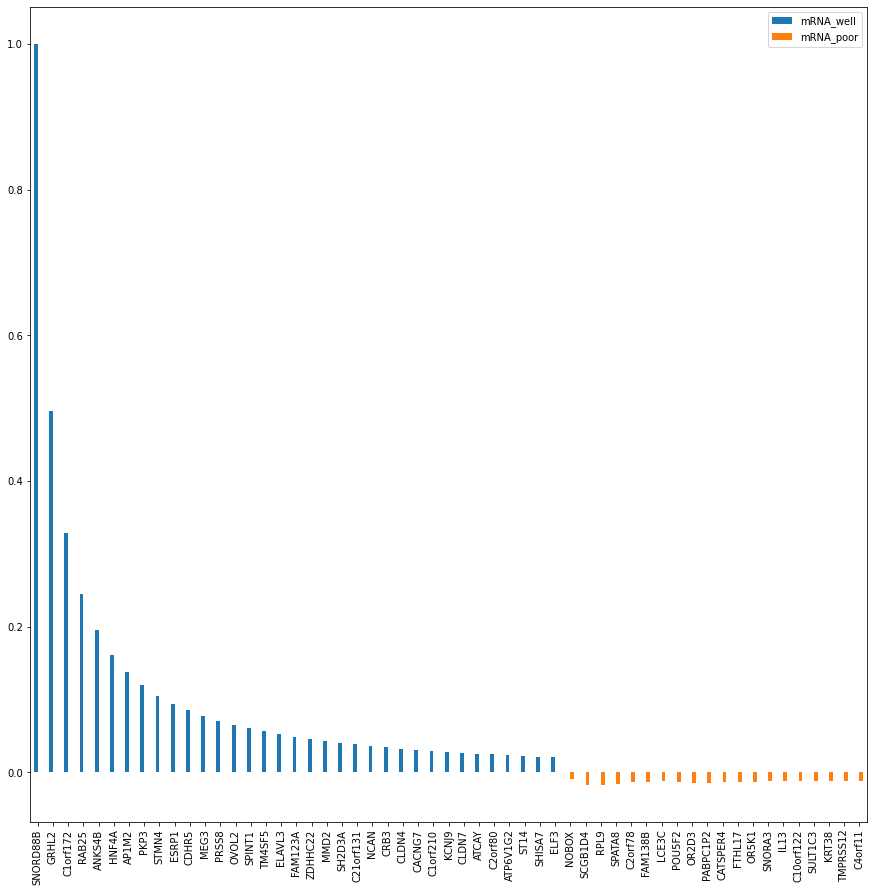

In [ ]:
mRNA_well_r2_df = pd.DataFrame.from_dict(mRNA_well_error).transpose()['mRNA_well_r2_avg']

mRNA_poor_r2_df = pd.DataFrame.from_dict(mRNA_poor_error).transpose()['mRNA_poor_r2_avg']
#print(mRNA_poor_r2_df)

mRNA_r2_df = pd.DataFrame([mRNA_well_r2_df, mRNA_poor_r2_df]).transpose()
#print(mRNA_r2_df)
mRNA_r2_df.columns = ['mRNA_well', 'mRNA_poor']
mRNA_r2_df.plot(kind='bar', figsize=(15, 15))

---
---

**Part 3: Logistic Regression (40 points)**

In this exercise, you will implement logistic regression by gradient descent.  You <u>should not</u> use off the shelf logistic regression solvers for this problem. (Though you may use them to check your work.) This will also exercise your data skills, so you may want to read up on the pandas toolkit.

Problem: you are given a dataset of 400 people; half female/half male, also half of the people are basketball players and half are not.   The data has three features: height (inches), weight (pounds), and female (0=male, 1=female).  The variable you want to predict is basketball player (0=non-player, 1=player).

In [ ]:
basketball_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv'
basketball_df=pd.read_csv(basketball_URL)
basketball_df.head()

#You will need to extract the target and dependent/feature variables yourself
#Refer to the previous parts for examples

,height,weight,female,basketball
0,74.8,221.2,0,1
1,65.6,147.3,1,1
2,74.8,166.8,0,0
3,68.5,174.1,0,0
4,66.8,156.6,1,0


Implement gradient descent for logistic regression.  You may want to consult the notes in the regression model on logistic regression for help.

Train the model on 80% of the data, reserving 20% for the test set.

*Hint:* You can re-use a significant amount of your code from the first hands-on activity. (Alternately, you may also re-use code from the example solution I have provided for the first hands-on activity.)

*Warning*: You may find it necessary to normalize the feature data, just like in first hands-on activity! However, unlike the hands-on, <u>do not</u> normalize the target data.

**3.1:** Train the model first to predict the probability of basketball given height.   Evaluate on the test set in a few ways:

Compute the average loss on the test set: $$-\frac{1}{N}\sum_{i-1}^N\log\left(target_i\cdot P\left(prediction_i\right)\:+\:\left(1-target_i\right)\left(1-P\left(prediction_i\right)\right)\right)$$

(Note this is just a clever way to say use P(prediction) when target is 1, 1-P(prediction) when target is 0.)

Compute the accuracy on the test set by predicting someone is a basketball player if P(prediction) > 0.5.

Plot the training data as well as the learned logistic regression function, on the same plot. (I'm looking for somthing similar to what is shown on Slide 29 of Week 2.)

In [ ]:
basketball_target = np.array(basketball_df['basketball'], dtype='float').reshape(-1,1)
heights = np.array(basketball_df['height'], dtype='float').reshape(-1,1)
basketball_traindata, basketball_testdata, basketball_traintest, basketball_testtarget = train_test_split(heights, basketball_target.ravel(), test_size = 0.2)

# computeMSEBatchGradient:
#   weights - vector of weights (univariate linear = 2 weights)
#   features - vector (or matrix) of feature values
#   targets - vector of target values, same length as features
#
#   returns average gradient over the batch of features
def computeMSEBatchGradient(weights,features,targets):
    predictions=features*weights[1]+weights[0]
    sigmoid = 1/(1+np.exp(-1*predictions))
    errors=targets-sigmoid
    gradient=np.array([-2.0*np.average(errors),-2.0*np.average(features*errors)])

    return gradient

# computeGradientDescentWeightUpdate:
#   weights - vector initial weights
#   features - vector/matrix of features
#   targets - vector of target values
#   learning_rate - step length for update
def computeGradientDescentWeightUpdate(weights, features, targets, learning_rate):

  gradient=computeMSEBatchGradient(weights,features,targets)
  weights = weights - learning_rate * gradient

  return weights

# pick some weights sort of in the right ballpark
weights=[20000.,150.]
learning_rate=0.0001

def run(weights,features,targets,learning_rate,total_iterations=10000,iterations_per_report=1000):
  for step in range(total_iterations):
    weights=computeGradientDescentWeightUpdate(weights,features,targets,learning_rate)
    if (step%iterations_per_report == 0):
      print(weights)
  print(weights)
  return weights

final_weights=run(weights,basketball_traindata.ravel(),basketball_traintest,learning_rate)

[19999.99990125   149.99328619]
[19999.90115125   143.27947369]
[19999.80240125   136.56566119]
[19999.70365125   129.85184869]
[19999.60490125   123.13803619]
[19999.50615126   116.42422369]
[19999.40740126   109.71041119]
[19999.30865126   102.99659869]
[19999.20990126    96.28278619]
[19999.11115126    89.56897369]
[19999.01250001    82.861875  ]


In [ ]:
# Check the actual result with LogisticRegression
from sklearn.linear_model import LogisticRegression
lin_model=LogisticRegression()
lin_model.fit(basketball_traindata,basketball_traintest)
basketball_testpredict = lin_model.predict(basketball_testdata)

In [ ]:
# print slope
lin_model.coef_

array([[0.15242716]])

In [ ]:
# print intercept
lin_model.intercept_

array([-10.61042328])

In [ ]:
epsilon = 0.00000001
learning_rate=[0.9,0.0001]
def run(weights,features,target,learning_rate):
  for step in range(1000000):
    prev_weights=weights
    weights=computeGradientDescentWeightUpdate(weights,features,target,learning_rate)
    avg_gradient=(weights-prev_weights)/learning_rate
    if (np.linalg.norm(avg_gradient)<epsilon):
      break
    if (step%1000 == 0):
      print(weights)
  print(weights)
  return weights


final_weights=run(weights,basketball_traindata.ravel(),basketball_traintest,learning_rate)
# Result: [-9.55715679  0.13754057] pretty accurate...

[19999.11125      149.99328619]
[19110.36125      143.27947369]
[18221.61125      136.56566119]
[17332.86125001   129.85184869]
[16444.11125001   123.13803619]
[15555.36125001   116.42422369]
[14666.61125001   109.71041119]
[13777.86125001   102.99659869]
[12889.11125001    96.28278619]
[12000.36125001    89.56897369]
[11111.61125001    82.85516119]
[10222.86125001    76.14134869]
[9334.11125001   69.42753619]
[8445.36125001   62.71372369]
[7556.61125001   55.99991119]
[6667.86125001   49.28609869]
[5779.11125001   42.57228619]
[4890.36125001   35.85847369]
[4001.61125001   29.14466119]
[3112.86125001   22.43084869]
[2224.11125001   15.71703619]
[1335.36125001    9.00322369]
[446.61125001   2.28941119]
[35.78787716 -0.51193683]
[13.94703396 -0.1987339 ]
[ 0.52941067 -0.0069441 ]
[-5.31716381  0.07664091]
[-7.93539496  0.11411186]
[-9.21470713  0.13243183]
[-9.87136381  0.14183818]
[-10.21714069   0.14679211]
[-10.40167118   0.14943609]
[-10.5008522    0.15085724]
[-10.55436329   0.1516

In [ ]:
#Calculate probility
def calculate_probability(weights, features):
  predictions = features*weights[1]+weights[0]
  p_prediction = 1/(1+np.exp(-1*predictions))
  return p_prediction

In [ ]:
# Calculate loss
def calculate_loss(weights, features, targets):
  p_prediction = calculate_probability(weights, features)
  loss = np.log(targets*p_prediction+(1-targets)*(1-p_prediction))
  loss = -np.average(loss)
  return loss
loss = calculate_loss(final_weights, basketball_testdata.ravel(), basketball_testtarget)
print('Loss= {}'.format(loss))

Loss= 0.6167765790766647


In [ ]:
def actual_probability(probability):
  if probability > 0.5:
    return 1
  else:
    return 0
def calculate_accuracy(weights, features, targets):
  basketball_prob = calculate_probability(weights, features)
  basketball_pred = np.array([actual_probability(pro) for pro in basketball_prob])
  accuracy = np.mean(np.equal(basketball_pred,targets))
  return accuracy
accuracy = calculate_accuracy(final_weights, basketball_testdata.ravel(), basketball_testtarget)
print('Accuracy= {}'.format(accuracy))

Accuracy= 0.6


Text(0, 0.5, 'Probability of a basketball player')

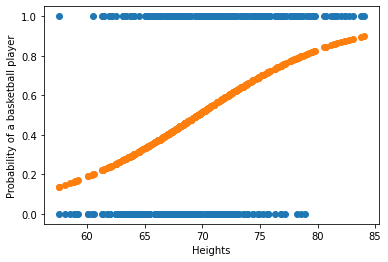

In [ ]:
#display(heights.shape, basketball_target.shape)
plt.scatter(heights, basketball_target, label = 'Actual data')
predicts = calculate_probability(final_weights, heights)
plt.scatter(heights, predicts, label = 'Prediction')
plt.xlabel('Heights')
plt.ylabel('Probability of a basketball player')

In conclusion, the taller a person is, the higher chance that the person is a basketball player. The learning result is pretty much in line with common sense.

**3.2:**  Now train the model to be gender dependent by incorporating both the height and female features.  Evaluate on the same test set with average loss and accuracy.

Plot the logistic regression function across heights for male and female. (In other words, you will now plot two sigmoid curves, one for when gender=0, and one for when gender=1.)

Do the learned functions make sense relative to one another? Explain.

In [ ]:
gender_height = pd.DataFrame([basketball_df['height'], basketball_df['female']]).transpose().values
basketball_target = basketball_df['basketball'].values
basketball_traindata, basketball_testdata, basketball_traintest, basketball_testtarget = train_test_split(gender_height, basketball_target, test_size=0.2)
#display(basketball_traindata.shape, basketball_testdata.shape, basketball_traintest.shape, basketball_testtarget.shape)

# Update calculate_probability method since there is one additional feature: gender
def calculate_probability(weights, features):
  predictions = features[1]*weights[2]+features[0]*weights[1]+weights[0]
  p_prediction = 1/(1+np.exp(-1*predictions))
  return p_prediction

# Update batchGradient desecent method...
def computeMSEBatchGradient(weights,features,targets):
    sigmoid = calculate_probability(weights, features)
    errors=targets-sigmoid
    gradient=np.array([-2.0*np.average(errors),-2.0*np.average(features[0]*errors),-2.0*np.average(features[1]*errors)])

    return gradient

In [ ]:
# Check the actual result of the logistic regression first
lin_model=LogisticRegression()
lin_model.fit(basketball_traindata,basketball_traintest)
basketball_testpredict = lin_model.predict(basketball_testdata)
# print intercept and slope
display(lin_model.intercept_, lin_model.coef_)

array([-18.25824857])

array([[0.25133073, 1.39469563]])

In [ ]:
weights = [0, 10, 10]
learning_rate = [.001, .00001, .0003]
final_weights=run(weights,basketball_traindata.transpose(),basketball_traintest,learning_rate)
# It take about 2 mins to run
# Final result (somewhere close to): [-16.58930418   0.22923771   1.21034714]

In [ ]:
#final_weights_data = final_weights #Save the data so that I won't have to run it everytime
#display(final_weights_data)

In [ ]:
# Calculate loss
loss = calculate_loss(final_weights, basketball_testdata.ravel(), basketball_testtarget)
print('Loss= {}'.format(loss))

Loss= 1.1542347647454314


In [ ]:
# Calculate accuracy
accuracy = calculate_accuracy(final_weights, basketball_testdata.transpose(), basketball_testtarget)
print('Accuracy= {}'.format(accuracy))

Accuracy= 0.625


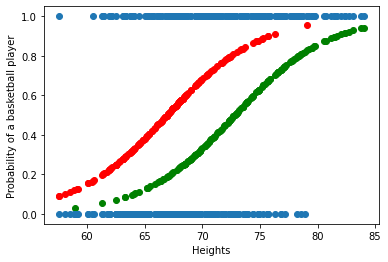

In [ ]:
plt.xlabel('Heights')
plt.ylabel('Probability of a basketball player')
# Extra only man from the dataframe and plot
man = basketball_df[basketball_df['female']==0]
man_predict = calculate_probability(final_weights, np.array([man['height'], man['female']]))
plt.scatter(man['height'].values, man_predict, c='green', label='Probablity for man')
# Extra only woman from the dataframe and plot
woman = basketball_df[basketball_df['female']==1]
woman_predict = calculate_probability(final_weights, np.array([woman['height'], woman['female']]))
plt.scatter(woman['height'].values, woman_predict, c='red', label='Probablity for woman')

plt.scatter(heights, basketball_target, label = 'Actual data')

Answer: In conclusion, the graph does make sense that men are generally taller than women. For both genders, the taller a person is, the more likely the person is a basketball player. On the other hand, if a man and a woman have the same height, the woman is more likely to be a basketball player.

**3.3:** Incorporate the weight feature (training (height, weight) and (height, weight, gender)). Evaluate on average loss and accuracy.  Does weight help as a feature?

In [ ]:
# Training (height, weight)
height_weight = pd.DataFrame([basketball_df['height'], basketball_df['weight']]).transpose().values
basketball_traindata, basketball_testdata, basketball_traintest, basketball_testtarget = train_test_split(height_weight, basketball_target, test_size=0.2)


In [ ]:
# Check the actual result of the logistic regression first
lin_model=LogisticRegression()
lin_model.fit(basketball_traindata,basketball_traintest)
basketball_testpredict = lin_model.predict(basketball_testdata)
# print intercept and slope
display(lin_model.intercept_, lin_model.coef_)

array([4.42048878])

array([[-0.18390427,  0.04628632]])

In [ ]:
# Calculate the weights
weights = [17, 20, 20]
learning_rate = [.0005, .00001, .0003]
final_weights=run(weights,basketball_traindata.transpose(),basketball_traintest,learning_rate)
# Takes about 2 min
# Final result should close to: [-0.94734975 -0.21658488  0.07491475]

[-1.30252743 -0.20916939  0.10751947]
[-1.30098373 -0.20919976  0.10752265]
[-1.29944029 -0.20923013  0.10752583]
[-1.29789712 -0.2092605   0.10752902]
[-1.29635422 -0.20929085  0.1075322 ]
[-1.29481159 -0.20932121  0.10753538]
[-1.29326923 -0.20935156  0.10753856]
[-1.29172714 -0.2093819   0.10754174]
[-1.29018531 -0.20941223  0.10754492]
[-1.28864376 -0.20944257  0.1075481 ]
[-1.28710247 -0.20947289  0.10755127]
[-1.28556145 -0.20950321  0.10755445]
[-1.28402069 -0.20953353  0.10755763]
[-1.28248021 -0.20956384  0.1075608 ]
[-1.28093999 -0.20959415  0.10756398]
[-1.27940004 -0.20962444  0.10756716]
[-1.27786036 -0.20965474  0.10757033]
[-1.27632095 -0.20968503  0.1075735 ]
[-1.27478181 -0.20971531  0.10757668]
[-1.27324293 -0.20974559  0.10757985]
[-1.27170432 -0.20977586  0.10758302]
[-1.27016598 -0.20980613  0.10758619]
[-1.26862791 -0.20983639  0.10758937]
[-1.2670901  -0.20986665  0.10759254]
[-1.26555256 -0.2098969   0.10759571]
[-1.26401529 -0.20992715  0.10759888]
[-1.26247829

In [ ]:
# Calculate loss
loss = calculate_loss(final_weights, basketball_testdata.ravel(), basketball_testtarget)
print('Loss= {}'.format(loss))

Loss= 1.6926412056314866


In [ ]:
# Calculate accuracy
accuracy = calculate_accuracy(final_weights, basketball_testdata.transpose(), basketball_testtarget)
print('Accuracy= {}'.format(accuracy))

Accuracy= 0.7125


In [ ]:
# Training (height, weight, gender)
height_weight_gender = pd.DataFrame([basketball_df['height'], basketball_df['weight'], basketball_df['female']]).transpose().values
basketball_traindata, basketball_testdata, basketball_traintest, basketball_testtarget = train_test_split(height_weight_gender, basketball_target, test_size=0.2)
# Update calculate_probability method since there is one additional feature: gender
def calculate_probability(weights, features):
  predictions = features[2]*weights[3]+features[1]*weights[2]+features[0]*weights[1]+weights[0]
  p_prediction = 1/(1+np.exp(-1*predictions))
  return p_prediction

# Update batchGradient desecent method...
def computeMSEBatchGradient(weights,features,targets):
    sigmoid = calculate_probability(weights, features)
    errors=targets-sigmoid
    gradient=np.array([-2.0*np.average(errors),
              -2.0*np.average(features[0]*errors),
              -2.0*np.average(features[1]*errors),
              -2.0*np.average(features[2]*errors)])

    return gradient

In [ ]:
# Check the actual result of the logistic regression first
lin_model=LogisticRegression()
lin_model.fit(basketball_traindata,basketball_traintest)
basketball_testpredict = lin_model.predict(basketball_testdata)
# print intercept and slope
display(lin_model.intercept_, lin_model.coef_)

array([3.1603777])

array([[-0.19937227,  0.05787971,  0.74646659]])

In [ ]:
# Calculate the weights
weights = [10, 10, 10, 10]
learning_rate = [.0008, .00002, .00001, .0004]
final_weights=run(weights,basketball_traindata.transpose(),basketball_traintest,learning_rate)
# Takes about 2 min
# Final result should close to: [ 2.59467511 -0.18462363  0.05417198  0.98758839]

In [ ]:
# Calculate loss
loss = calculate_loss(final_weights, basketball_testdata.ravel(), basketball_testtarget)
print('Loss= {}'.format(loss))

Loss= 1.771948910191527


In [ ]:
# Calculate accuracy
accuracy = calculate_accuracy(final_weights, basketball_testdata.transpose(), basketball_testtarget)
print('Accuracy= {}'.format(accuracy))

Accuracy= 0.75


As the result, according to the result of accuracy, using all three parameters will have a more accurate prediction. In addition, I feel like that the result of final_weights is heavily depended on the initial variable of weights and learning rate. It is really hard to find the "sweet spot". I spent a good amount of time to just find those sweet spots.

---
---

**Submission:**

All code must be written in Python. Submit all files needed for the TA to grade.  You can choose one of two methods:

* iPython notebook: you can document your code and provide the written answers within the iPython notebook.  Please indicate your name at the top.  Also, if you are using Google Colab (or other online iPython notebook services), please download submit the ipynb file. (*Do not submit a link to the file.*)

* Zip archive: make sure to include both your writeup and the code, as well as instructions on how to execute the code. (Ideally, we would prefer that you ensure your code can run on the CSE stdlinux.cse.ohio-state.edu system, and your instructions are tailored to getting it running on said system. In general please avoid using any packages other than those mentioned in the lab itself and try not to do anything too tricky or unusual with regards to running your code.)

You may ask colleagues for general understanding assistance but do not share code.  You may start, however, from the hands-on code as a jumping off point.  Please do not copy code from the internet in developing your answer.